### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2043]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2046]:
data = pd.read_csv('data/coupons.csv')

In [2048]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [2050]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [2053]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [2056]:

def percentage_missing(df, feature):
    num_rows_missing = df[feature].isnull().sum()
    total_rows = df.shape[0]
    return (num_rows_missing/total_rows * 100)

print("car feature missing ", percentage_missing(data, 'car'), "%")
print("Bar feature missing ", percentage_missing(data, 'Bar'), "%")
print("CoffeeHouse feature missing ", percentage_missing(data, 'CoffeeHouse'), "%")
print("CarryAway  feature missing ", percentage_missing(data, 'CarryAway'),  "%")
print("RestaurantLessThan20 feature missing ", percentage_missing(data, 'RestaurantLessThan20'), "%")
print("Restaurant20To50 feature missing " , percentage_missing(data, 'Restaurant20To50'), "%")


car feature missing  99.14853358561967 %
Bar feature missing  0.8435824660990224 %
CoffeeHouse feature missing  1.7108167770419427 %
CarryAway  feature missing  1.1904761904761905 %
RestaurantLessThan20 feature missing  1.0249132765689057 %
Restaurant20To50 feature missing  1.490066225165563 %


###### Strategy is the following:
###### 1. Since 99% of the car feature is missing, drop it
###### 2. For features like Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50 roughly 1 - 1.5% of the total data are missing. So, let's replace them with the most common values in those features


In [2059]:
#drop car
data = data.drop(['car'], axis=1)

In [2061]:
#replace missing with mode
data['Bar']=data['Bar'].fillna(data['Bar'].value_counts().index[0])
data['CoffeeHouse']=data['CoffeeHouse'].fillna(data['CoffeeHouse'].value_counts().index[0])
data['CarryAway']=data['CarryAway'].fillna(data['CarryAway'].value_counts().index[0])
data['RestaurantLessThan20']=data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].value_counts().index[0])
data['Restaurant20To50']=data['Restaurant20To50'].fillna(data['Restaurant20To50'].value_counts().index[0])

data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12684 non-null  object
 15  CoffeeHouse           12684 non-null

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

4. What proportion of the total observations chose to accept the coupon?



In [2064]:
number_of_accepted_coupons = data.groupby('Y')['Y'].value_counts()[1]
total_coupons_sent_out = data['Y'].shape[0]
proportion_of_accepted_coupons =  number_of_accepted_coupons/total_coupons_sent_out 
print("Proportion of the total observations chose to accept the coupon is: ", proportion_of_accepted_coupons)

Proportion of the total observations chose to accept the coupon is:  0.5684326710816777


5. Use a bar plot to visualize the `coupon` column.

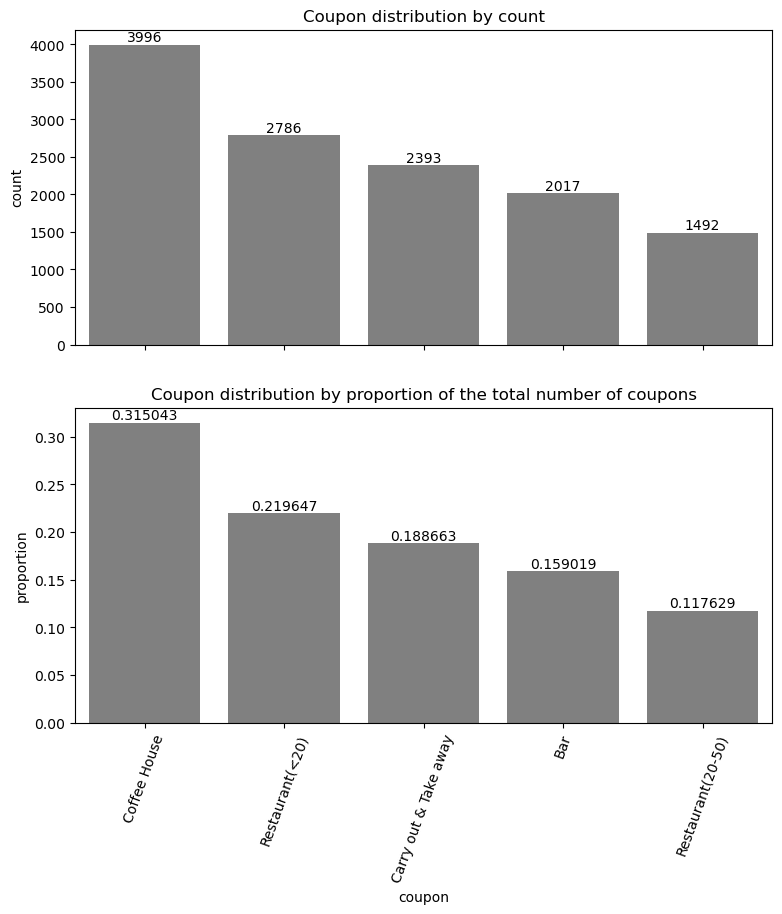

In [2067]:
# in sns countplot is the latest way to visualize counts of categorical features. However going with bar plot since this problem asks for it

fig, ax = plt.subplots(2, 1, figsize=(9, 9), sharex=True)

#visualizing coupon distribution by count - Plot 0
#ax[0] = sns.countplot(x = 'coupon', data = data, order = data['coupon'].value_counts().index)

ax[0] = sns.barplot(x=data['coupon'].value_counts().index, y= data['coupon'].value_counts(), ax=ax[0], color='#808080')
plt.xticks(rotation=70)
ax[0].set_title ("Coupon distribution by count")
for i in ax[0].containers:
    ax[0].bar_label(i,)


#visualizing coupon column based on percentage - Plot 1
# in sns countplot is the latest way to visualize counts of categorical features. However going with bar plot since this problem asks for it

#ax[1] = sns.countplot(x = 'coupon', data = data, order = data['coupon'].value_counts().index, stat='percent')
ax[1] = sns.barplot(x=data['coupon'].value_counts().index, y= data['coupon'].value_counts(normalize=True), ax=ax[1], color='#808080')
#plt.xticks(rotation=70) 
ax[1].set_title ("Coupon distribution by proportion of the total number of coupons")
for i in ax[1].containers:
    ax[1].bar_label(i,)

plt.show()



6. Use a histogram to visualize the temperature column.

In [2069]:
# temperature feature in this dataset is a categorical feature
print(data['temperature'].value_counts())
print(data['temperature'].unique())

temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64
[55 80 30]


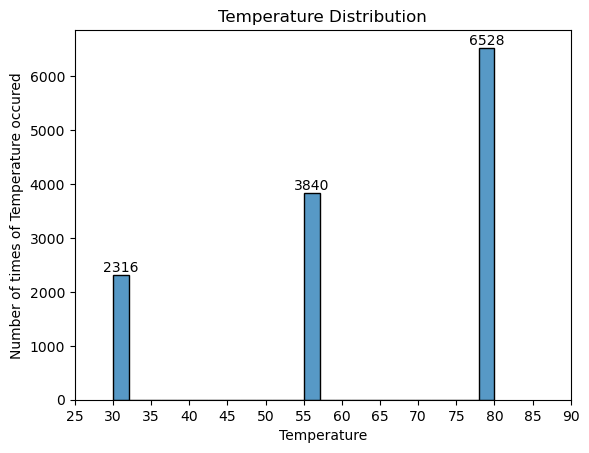

In [2072]:
#visualizing temperature column using a histogram
ax = sns.histplot(data = data['temperature'], kde=False)
ax.set_title ("Temperature Distribution")

# following code needed to suppress display of 0 count for temperatures not occuring and display of non zero count for temperatures occuring for each bar
labels = [str(v) if v else '' for v in ax.containers[0].datavalues]
ax.bar_label(ax.containers[0], labels=labels)

plt.xlabel('Temperature')
plt.ylabel('Number of times of Temperature occured')

#following code is needed to show the exact values of the temperature
plt.xticks(list(range(25, 95, 5)))

plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [2075]:
df_bar = data.query('coupon == "Bar"')
df_bar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2017 entries, 9 to 12682
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           2017 non-null   object
 1   passanger             2017 non-null   object
 2   weather               2017 non-null   object
 3   temperature           2017 non-null   int64 
 4   time                  2017 non-null   object
 5   coupon                2017 non-null   object
 6   expiration            2017 non-null   object
 7   gender                2017 non-null   object
 8   age                   2017 non-null   object
 9   maritalStatus         2017 non-null   object
 10  has_children          2017 non-null   int64 
 11  education             2017 non-null   object
 12  occupation            2017 non-null   object
 13  income                2017 non-null   object
 14  Bar                   2017 non-null   object
 15  CoffeeHouse           2017 non-null   obje

2. What proportion of bar coupons were accepted?


In [2078]:
ds_bar = (df_bar['Y'].value_counts(normalize=True))
print(ds_bar)
print("Proportion of bar coupons accepted is ", ds_bar[1])

Y
0    0.589985
1    0.410015
Name: proportion, dtype: float64
Proportion of bar coupons accepted is  0.41001487357461575


In [2080]:
ds_bar = (df_bar['Y'].value_counts())
print(ds_bar)
print("Proportion of bar coupons accepted is ", ds_bar[1])

Y
0    1190
1     827
Name: count, dtype: int64
Proportion of bar coupons accepted is  827


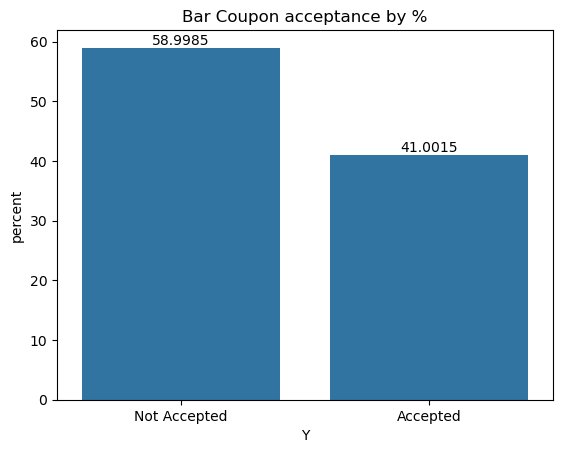

In [2082]:
# additional visualization, not requested by the problem
#visualizing bar coupon acceptance 
ax = sns.countplot(data=df_bar, x='Y', stat="percent")
fig.canvas.draw()
ax.set_title ("Bar Coupon acceptance by %")

#setting bar label
for i in ax.containers:
    ax.bar_label(i,)

# the tick label by default takes value from dataframe, in this case 0 and 1, 0 meaning 'Not Accepted', 1 meaning 'Accepted'
# following code is to show more meaningful tick label instead of 0 and 1

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Not Accepted'
labels[1] = 'Accepted'

# need to set ticks again, otherwise python throws warning
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(labels)
plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Filtered Group = Drivers who went to bar less than 3 times a month and received bar coupons
df_filtered_by_condition shape
(1818, 1)
Total coupon sent out to filtered group
1818
Total coupon accepted by the filtered group
674
Coupon acceptance rate of drivers who_went_to_bar_lte_three times a month considering only the coupons sent out to this group
0.37073707370737075
##########################
Filtered Group = Drivers who went to bar 4 or more times a month and received bar coupons
df_filtered_by_condition shape
(199, 1)
Total coupon sent out to filtered group
199
Total coupon accepted by the filtered group
153
Coupon acceptance rate of drivers_who_went_to_bar_gt_three a month considering only the coupons sent out to this group
0.7688442211055276


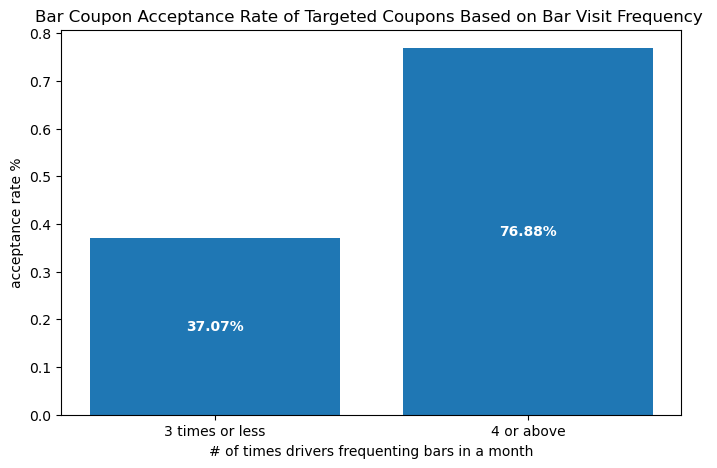

Conclusion: Those drivers who visited bars more than 4 times a month had a much higher rate of bar coupon acceptance (approx 77% vs. 37%) than those drivers who visited the bar 3 or less times a month


In [2085]:
def acceptance_rate_of_coupons_considering_coupons_sent_only_to_filter_group(df, df_filtered_by_condition):
    total_count = df_filtered_by_condition[['Y']].shape[0]
    print("df_filtered_by_condition shape")
    print(df_filtered_by_condition[['Y']].shape)
    print("Total coupon sent out to filtered group")
    print(total_count)
    total_coupon_accepted_by_filtered_group = df_filtered_by_condition[['Y']].query('Y == 1').shape[0]
    print("Total coupon accepted by the filtered group")
    print(total_coupon_accepted_by_filtered_group)
    return total_coupon_accepted_by_filtered_group/total_count


def visualize_acceptance(list1, list2,title, xlabel):
    fig, ax = plt.subplots(figsize =(8, 5))
    bars_acceptance = plt.bar(list1,list2)
    plt.ylabel('acceptance rate %')
    plt.xlabel(xlabel)
    ax.bar_label(bars_acceptance, labels=[f'{x:.2%}' for x in list2], label_type='center', color='white', fontweight='bold')
    plt.title( title)
    plt.show()


#what all possible values are there under 'Bar' feature
data['Bar'].unique()
# array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)


# problem 3 condition
bar_group_names_lte_three = ['never', 'less1', '1~3']
bar_group_names_gt_three = ['gt8', '4~8']

drivers_who_went_to_bar_lte_three = df_bar.query('Bar in @bar_group_names_lte_three')
drivers_who_went_to_bar_gt_three = df_bar.query('Bar in @bar_group_names_gt_three')


#### group 1 = Drivers who went to bar less than 3 times a month ####
print("Filtered Group = Drivers who went to bar less than 3 times a month and received bar coupons")
targeted_acc_rt_dr_bar_lte_three_acc = acceptance_rate_of_coupons_considering_coupons_sent_only_to_filter_group(df_bar,drivers_who_went_to_bar_lte_three)
print("Coupon acceptance rate of drivers who_went_to_bar_lte_three times a month considering only the coupons sent out to this group")
print(targeted_acc_rt_dr_bar_lte_three_acc)

print("##########################")

#### group 2 = Drivers who went to bar 4 or more times a month ####
print("Filtered Group = Drivers who went to bar 4 or more times a month and received bar coupons")
targeted_acc_rt_dr_bar_gt_three_acc = acceptance_rate_of_coupons_considering_coupons_sent_only_to_filter_group(df_bar,drivers_who_went_to_bar_gt_three)
print("Coupon acceptance rate of drivers_who_went_to_bar_gt_three a month considering only the coupons sent out to this group")
print(targeted_acc_rt_dr_bar_gt_three_acc)

# visualization
list1 = ['3 times or less', '4 or above']
list2 =[targeted_acc_rt_dr_bar_lte_three_acc, targeted_acc_rt_dr_bar_gt_three_acc]
visualize_acceptance(list1, list2, 'Bar Coupon Acceptance Rate of Targeted Coupons Based on Bar Visit Frequency ', '# of times drivers frequenting bars in a month')

print("Conclusion: Those drivers who visited bars more than 4 times a month had a much higher rate of bar coupon acceptance (approx 77% vs. 37%) than those drivers who visited the bar 3 or less times a month") 





4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


Filtered Group = Drivers who went to bar more than once a month and over 25 years of age and received bar coupon
Total coupon sent out to filtered group
420
Total coupon accepted by the filtered group
292
acceptance_rate_drivers_who_went_to_bar_more than once, and over 25
0.6952380952380952
##########################
Filtered Group = Rest of the world who received bar coupon
Total coupon sent out to filtered group
1597
Total coupon accepted by the filtered group
535
acceptance_rate_drivers_who_do not meet the conditions
0.33500313087038197


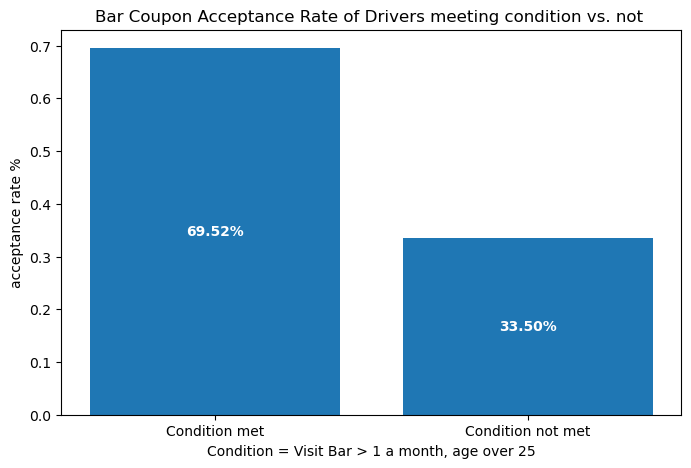

Conclusion: Those drivers meeting the condition of visiting bar more than once a month and over 25 years age had a higher rate (69.5% vs 33.5%) of bar coupon acceptance than those drivers who were not meeting the conditions and yet received bar coupons


In [2088]:
#problem 4 condition

####### group 1 = Drivers visiting bars more than once a month and over 25 years of age #######################3
print("Filtered Group = Drivers who went to bar more than once a month and over 25 years of age and received bar coupon")
bar_group_names_gt_once = ['1~3','gt8', '4~8']
drivers_visiting_bar_gt_once = df_bar.query('Bar in @bar_group_names_gt_once')

data['age'].unique()
age_groups_above_25 = ['46','26', '31', '41', '50plus', '36']
drivers_visting_bar_gt_once_and_over_twentyfive = drivers_visiting_bar_gt_once.query('age in @age_groups_above_25')


targeted_drivers_visting_bar_gt_once_and_over_twentyfive_acc = acceptance_rate_considering_coupons_sent_only_to_filter_group(df_bar,drivers_visting_bar_gt_once_and_over_twentyfive)
print("acceptance_rate_drivers_who_went_to_bar_more than once, and over 25")
print(targeted_drivers_visting_bar_gt_once_and_over_twentyfive_acc)

print("##########################")


################ group 2 = rest of the world ###########################
#rest of the world who received bar coupona
#all_other_drivers_df = data[~data.isin(drivers_visting_bar_gt_once_and_over_twentyfive)]
print("Filtered Group = Rest of the world who received bar coupon")
all_other_drivers_df = df_bar.loc[df_bar.index.difference(drivers_visting_bar_gt_once_and_over_twentyfive.index)]
targeted_to_all_other_drivers_acc = acceptance_rate_considering_coupons_sent_only_to_filter_group(df_bar, all_other_drivers_df)
print("acceptance_rate_drivers_who_do not meet the conditions")
print(targeted_to_all_other_drivers_acc)


# visualization
list1 = ['Condition met', 'Condition not met']
list2 =[targeted_drivers_visting_bar_gt_once_and_over_twentyfive_acc, targeted_to_all_other_drivers_acc]
visualize_acceptance(list1, list2, 'Bar Coupon Acceptance Rate of Drivers meeting condition vs. not ', 'Condition = Visit Bar > 1 a month, age over 25')

print("Conclusion: Those drivers meeting the condition of visiting bar more than once a month and over 25 years age had a higher rate (69.5% vs 33.5%) of bar coupon acceptance than those drivers who were not meeting the conditions and yet received bar coupons") 



5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


Filtered Group = Drivers who went to bar more than once a month and had passangers who are not kids and had occupations other than Farming Fishing & Forestry and received bar coupon
Total coupon sent out to filtered group
551
Total coupon accepted by the filtered group
393
acceptance_rate_drivers_who_went_to_bar_more than once, with no kids passanger and occupation not Farming Fishing & Forestry considering bar coupons sent out only to this group
0.7132486388384754
Filtered Group = Rest of the world who received bar coupons
Total coupon sent out to filtered group
1466
Total coupon accepted by the filtered group
434
acceptance_rate_drivers_who_do not meet the conditions
0.296043656207367


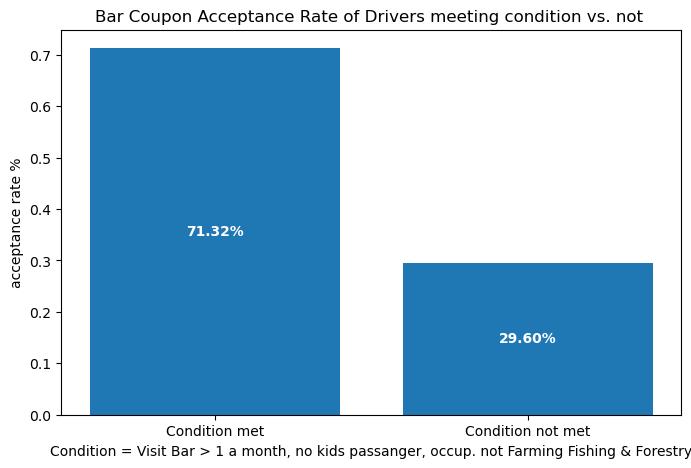

Conclusion: Those drivers meeting the conditions (Drivers who went to bar more than once a month and had passangers who were not kids and had occupations other than Farming Fishing & Forestry and received bar coupon) had a higher rate of bar coupon acceptance (approx 71.3% vs. 29.6%)than those drivers who were not meeting the conditions and yet received bar coupons


In [2091]:
data['passanger'].unique()
# array(['Alone', 'Friend(s)', 'Kid(s)', 'Partner'], dtype=object)

#problem 5 condition

####### group 1 = Drivers visiting bars more than once a month and have passengers who are not kids and have occupation other than Farming, Fishing or Forestry #######################3
print("Filtered Group = Drivers who went to bar more than once a month and had passangers who are not kids and had occupations other than Farming Fishing & Forestry and received bar coupon")

#drivers who go to bar more than once a month and received bar coupon
bar_group_names_gt_once = ['1~3','gt8', '4~8']

drv_meeting_conditions_prob_5 = df_bar.query('Bar in @bar_group_names_gt_once & passanger != "Kid(s)" & occupation != "Farming Fishing & Forestry"')
targeted_drivers_meeting_conditions_prob5_acc = acceptance_rate_considering_coupons_sent_only_to_filter_group(df_bar,drv_meeting_conditions_prob_5)

print("acceptance_rate_drivers_who_went_to_bar_more than once, with no kids passanger and occupation not Farming Fishing & Forestry considering bar coupons sent out only to this group")
print(targeted_drivers_meeting_conditions_prob5_acc)

print("========================")
####### group 2 = Rest of the world who received bar coupons #######################3
print("Filtered Group = Rest of the world who received bar coupons")

# rest of the data that do not match above condition
#rest_df = data[~data.isin(drivers_visiting_bar_gt_once_no_kidpassenger_occ)]
rest_df = df_bar.loc[df_bar.index.difference(drv_meeting_conditions_prob_5.index)]
targeted_to_drivers_not_meeting_conditions_acc = acceptance_rate_considering_coupons_sent_only_to_filter_group(data, rest_df)
print("acceptance_rate_drivers_who_do not meet the conditions")
print(targeted_to_drivers_not_meeting_conditions_acc)

# visualization
list1 = ['Condition met', 'Condition not met']
list2 =[targeted_drivers_meeting_conditions_prob5_acc, targeted_to_drivers_not_meeting_conditions_acc]
visualize_acceptance(list1, list2, 'Bar Coupon Acceptance Rate of Drivers meeting condition vs. not ', 'Condition = Visit Bar > 1 a month, no kids passanger, occup. not Farming Fishing & Forestry')

print("Conclusion: Those drivers meeting the conditions (Drivers who went to bar more than once a month and had passangers who were not kids and had occupations other than Farming Fishing & Forestry and received bar coupon) had a higher rate of bar coupon acceptance (approx 71.3% vs. 29.6%)than those drivers who were not meeting the conditions and yet received bar coupons") 




6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



Filtered Group = Drivers who meet condition and received bar coupon
Total coupon sent out to filtered group
776
Total coupon accepted by the filtered group
457
acceptance_rate_drivers_who_meet condition considering only bar coupons sent out to this group
0.5889175257731959
Filtered Group = Rest of the world who received bar coupons
Total coupon sent out to filtered group
1241
Total coupon accepted by the filtered group
370
acceptance_rate_drivers_who_do not meet the conditions
0.29814665592264306


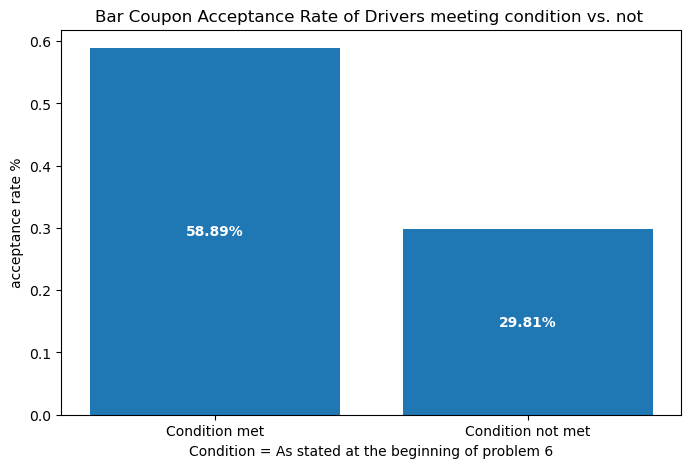

Conclusion: Those drivers meeting the conditions of Problem 6 had a higher rate of bar coupon acceptance (approx 59% vs. 29.8%)than those drivers who were not meeting the conditions and yet received bar coupons


In [2094]:

data['maritalStatus'].unique()
#['Unmarried partner', 'Single', 'Married partner', 'Divorced','Widowed']

data['age'].unique()
#['21', '46', '26', '31', '41', '50plus', '36', 'below21']

data['RestaurantLessThan20'].unique()
#['4~8', '1~3', 'less1', 'gt8', 'never']

data['income'].unique()
#['$37500 - $49999', '$62500 - $74999', '$12500 - $24999', '$75000 - $87499', '$50000 - $62499', '$25000 - $37499','$100000 or More', '$87500 - $99999', 'Less than $12500']


####### group 1 = Drivers visiting bars more than once a month and had passengers who are not kids and were not widowed #######################3
print("Filtered Group = Drivers who meet condition and received bar coupon")

#drivers who go to bar more than once a month and received bar coupon
bar_group_names_gt_once = ['1~3','gt8', '4~8']
age_grp_lt_thirty = ['21', '26', 'below21']
cheap_restaurant_gt_four = ['4~8', 'gt8']
group_income_lt_fity = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']

drv_meeting_conditions_prob_6_1 = df_bar.query('(Bar in @bar_group_names_gt_once & passanger != "Kid(s)" & maritalStatus != "Widowed") | (Bar in @bar_group_names_gt_once & age in @age_grp_lt_thirty)|(RestaurantLessThan20 in @ cheap_restaurant_gt_four & income in @group_income_lt_fity)')
targeted_drivers_meeting_conditions_prob6_acc_1 = acceptance_rate_considering_coupons_sent_only_to_filter_group(df_bar,drv_meeting_conditions_prob_6_1)

print("acceptance_rate_drivers_who_meet condition considering only bar coupons sent out to this group")
print(targeted_drivers_meeting_conditions_prob6_acc_1)

print("========================")
####### group 2 = Rest of the world who received bar coupons #######################3
print("Filtered Group = Rest of the world who received bar coupons")

# rest of the data that do not match above condition
#rest_df = data[~data.isin(drivers_visiting_bar_gt_once_no_kidpassenger_occ)]
rest_df_6_1 = df_bar.loc[df_bar.index.difference(drv_meeting_conditions_prob_6_1.index)]
targeted_to_drivers_not_meeting_conditions_acc_6_1 = acceptance_rate_considering_coupons_sent_only_to_filter_group(df_bar, rest_df_6_1)
print("acceptance_rate_drivers_who_do not meet the conditions")
print(targeted_to_drivers_not_meeting_conditions_acc_6_1)

# visualization
list1 = ['Condition met', 'Condition not met']
list2 =[targeted_drivers_meeting_conditions_prob6_acc_1, targeted_to_drivers_not_meeting_conditions_acc_6_1]
visualize_acceptance(list1, list2, 'Bar Coupon Acceptance Rate of Drivers meeting condition vs. not ', 'Condition = As stated at the beginning of problem 6')

print("Conclusion: Those drivers meeting the conditions of Problem 6 had a higher rate of bar coupon acceptance (approx 59% vs. 29.8%)than those drivers who were not meeting the conditions and yet received bar coupons") 


In [2095]:
drv_meeting_conditions_prob_6_1 = df_bar.query('(Bar in @bar_group_names_gt_once & passanger != "Kid(s)" & maritalStatus != "Widowed") | (Bar in @bar_group_names_gt_once & age in @age_grp_lt_thirty)|(RestaurantLessThan20 in @ cheap_restaurant_gt_four & income in @group_income_lt_fity)')
                                              
drv_meeting_conditions_prob_6_1.info()



<class 'pandas.core.frame.DataFrame'>
Index: 776 entries, 9 to 12544
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           776 non-null    object
 1   passanger             776 non-null    object
 2   weather               776 non-null    object
 3   temperature           776 non-null    int64 
 4   time                  776 non-null    object
 5   coupon                776 non-null    object
 6   expiration            776 non-null    object
 7   gender                776 non-null    object
 8   age                   776 non-null    object
 9   maritalStatus         776 non-null    object
 10  has_children          776 non-null    int64 
 11  education             776 non-null    object
 12  occupation            776 non-null    object
 13  income                776 non-null    object
 14  Bar                   776 non-null    object
 15  CoffeeHouse           776 non-null    objec

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

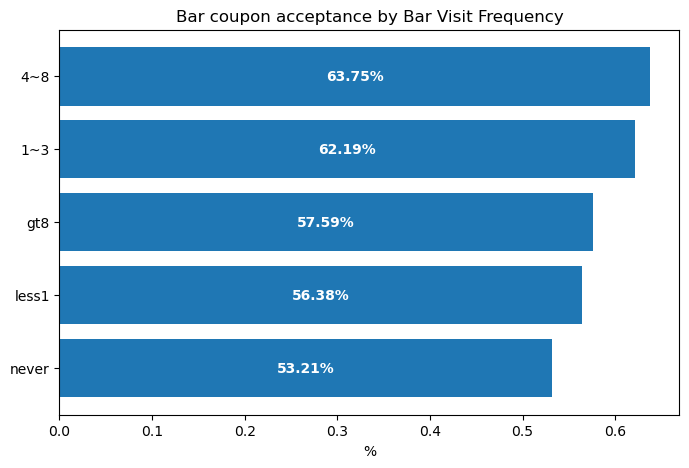

Null Hypothesis: Frequency of going to the bar had no bearing on bar coupon acceptance
We can see that those who frequented the bar had a higher tendency of accepting bar coupons. So we can reject the null hypothesis


In [2099]:
# Additional analysis on top of analysis done above in Q3-Q6.

# Coupon acceptance analysis by feature-group

def coupon_analysis_by_feature_group(df, feature):
    total_count_by_feature_group = df.groupby(feature)['Y'].count()
    total_count_by_feature_group
    number_of_groups =  df.groupby(feature).ngroups
    total_accepted_count_by_feature_group = df.query('Y == 1').groupby(feature)['Y'].count()
    total_accepted_count_by_feature_group
    total_rejected_count_by_feature_group = df.query('Y == 0').groupby(feature)['Y'].count()
    total_rejected_count_by_feature_group
    total_accepted_percent_by_feature_group = total_accepted_count_by_feature_group/total_count_by_feature_group
    total_accepted_percent_by_feature_group
    total_rejected_percent_by_feature_group = total_rejected_count_by_feature_group/total_count_by_feature_group
    total_rejected_percent_by_feature_group
    dict_feature = {
        'coupon':  feature,
        'total_count': total_count_by_feature_group, 
        'acceptance_count': total_accepted_count_by_feature_group, 
        'rejection_count': total_rejected_count_by_feature_group, 
        'acceptance': total_accepted_percent_by_feature_group, 
        'rejection': total_rejected_percent_by_feature_group}
    df_coupon_by_feature_group = pd.DataFrame(dict_feature)
    return df_coupon_by_feature_group
       

def visualize_coupon_analysis_by_feature_group(df, feature, title):
    coupon_analysis_df_by_percent = coupon_analysis_by_feature_group(data,feature).sort_values(by='acceptance', ascending=True).reset_index()
    acceptance_labels_in_percentage = coupon_analysis_df_by_percent['acceptance'].to_list()
    fig, ax = plt.subplots(figsize =(8, 5))
    bars_acceptance = plt.barh(coupon_analysis_df_by_percent[feature],coupon_analysis_df_by_percent['acceptance'])
    plt.xlabel('%')
    ax.bar_label(bars_acceptance, labels=[f'{x:.2%}' for x in acceptance_labels_in_percentage], label_type='center', color='white', fontweight='bold')
    plt.title(title)
    plt.show()

# Null Hypthesis - Frequency of going to the bar has no bearing on bar coupon acceptance
coupon_analysis_by_bar_frequency_group_visualize = visualize_coupon_analysis_by_feature_group(df_bar, 'Bar', 'Bar coupon acceptance by Bar Visit Frequency')

print("Null Hypothesis: Frequency of going to the bar had no bearing on bar coupon acceptance")
print("We can see that those who frequented the bar had a higher tendency of accepting bar coupons. So we can reject the null hypothesis")



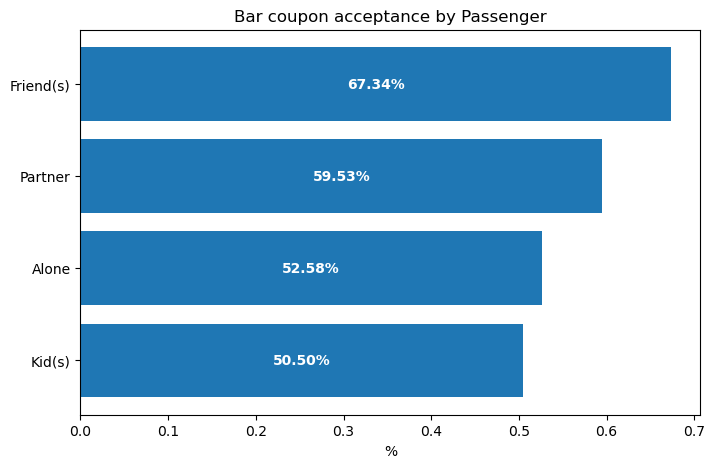

Null Hypthesis - type of passanger had no bearing on bar coupon acceptance
We can see that those who were with friends and partners had higher acceptance rate that those alone or with passanger kids. So we can reject the null hypothesis 


In [2100]:
# Null Hypthesis - type of passanger has no bearing on bar coupon acceptance
coupon_analysis_by_passanger_visualize = visualize_coupon_analysis_by_feature_group(df_bar, 'passanger', 'Bar coupon acceptance by Passenger')

print("Null Hypthesis - type of passanger had no bearing on bar coupon acceptance")
print("We can see that those who were with friends and partners had higher acceptance rate that those alone or with passanger kids. So we can reject the null hypothesis ")

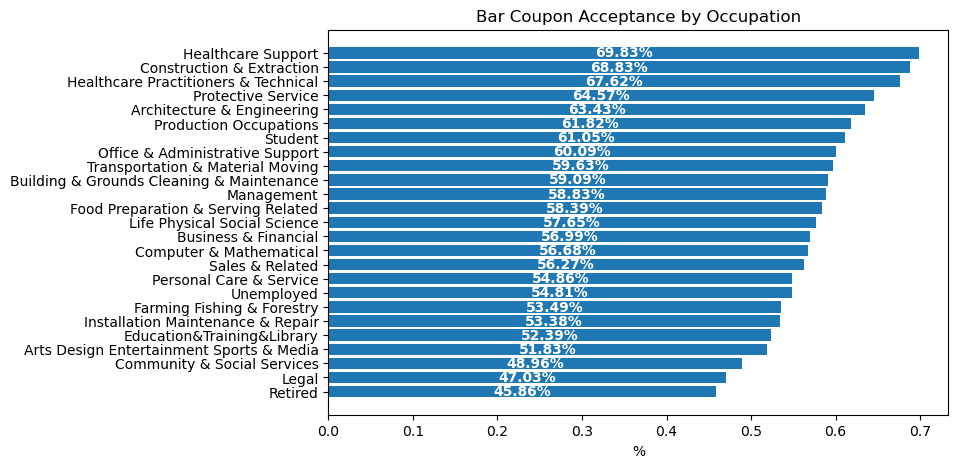

Null Hypthesis - occupation had no bearing on bar coupon acceptance
We can see that anyone employed had higher bar coupon acceptance rate that those who were retired. So we can reject the null hypothesis


In [2103]:
# Null hypothesis - Occupation has no bearing on bar coupon acceptance
coupon_analysis_by_occupation_frequency_group_visualize = visualize_coupon_analysis_by_feature_group(df_bar, 'occupation', 'Bar Coupon Acceptance by Occupation')

print("Null Hypthesis - occupation had no bearing on bar coupon acceptance")
print("We can see that anyone employed had higher bar coupon acceptance rate that those who were retired. So we can reject the null hypothesis")


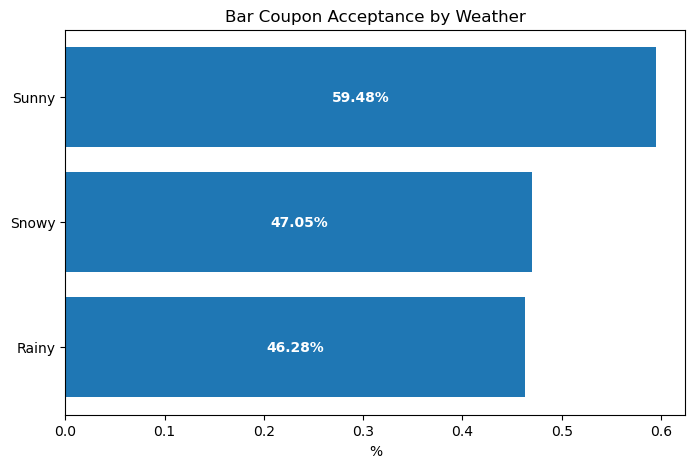

Null Hypthesis - weather has no bearing on bar coupon acceptance
We can see that acceptance rate was much higher in good weather like sunny than bad weather like Snowy or Rainy. So we can reject the null hypothesis


In [2104]:
# Null hypothesis - Occupation has no bearing on bar coupon acceptance
coupon_analysis_by_weather_group_visualize = visualize_coupon_analysis_by_feature_group(df_bar, 'weather', 'Bar Coupon Acceptance by Weather')

print("Null Hypthesis - weather has no bearing on bar coupon acceptance")
print("We can see that acceptance rate was much higher in good weather like sunny than bad weather like Snowy or Rainy. So we can reject the null hypothesis")


#### Conclusion: Based on observations made from Q3-Q7, following conclusion can be made - Those who frequented bars more than once a month, had friends or partners as passengers, were employed in the healthcare or related industry and the weather was sunny had a higher acceptance of bar coupon vs. when the conditions are not met

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [2108]:
def coupon_analysis(df, coupontype_list):
    total_coupon_count = []
    total_percentage = []
    coupon_acceptance_count = []
    coupon_rejection_count = []
    acceptance_percentage = []
    rejection_percentage = []
    for coupon_type in coupontype_list : 
        df_coupon_type = df.query('coupon == @coupon_type')
        #print(df_coupon_type)
        total_coupon_count.append(df_coupon_type.shape[0])
        #print(total_coupon_count)
        total_coupon_count_by_group = df_coupon_type.groupby('Y')['Y'].count()
        coupon_acceptance_count.append(total_coupon_count_by_group[1])
        coupon_rejection_count.append(total_coupon_count_by_group[0])
        acceptance_percentage.append(total_coupon_count_by_group[1]/ df_coupon_type.shape[0])
        rejection_percentage.append(total_coupon_count_by_group[0]/ df_coupon_type.shape[0])
        total_percentage.append(1)
    dict = {
             'coupon':  coupontype_list,
             'total_count': total_coupon_count, 
             'acceptance_count': coupon_acceptance_count, 
             'rejection_count': coupon_rejection_count, 
             'acceptance': acceptance_percentage, 
             'rejection': rejection_percentage,
             'total_percentage': total_percentage}
    
    df_coupon = pd.DataFrame(dict)
    return df_coupon

coupon_analysis_df_by_count = coupon_analysis(data, data['coupon'].unique()).sort_values(by='total_count')
coupon_analysis_df_by_count


,coupon,total_count,acceptance_count,rejection_count,acceptance,rejection,total_percentage
4,Restaurant(20-50),1492,658,834,0.441019,0.558981,1
3,Bar,2017,827,1190,0.410015,0.589985,1
2,Carry out & Take away,2393,1760,633,0.735478,0.264522,1
0,Restaurant(<20),2786,1970,816,0.707107,0.292893,1
1,Coffee House,3996,1995,2001,0.499249,0.500751,1


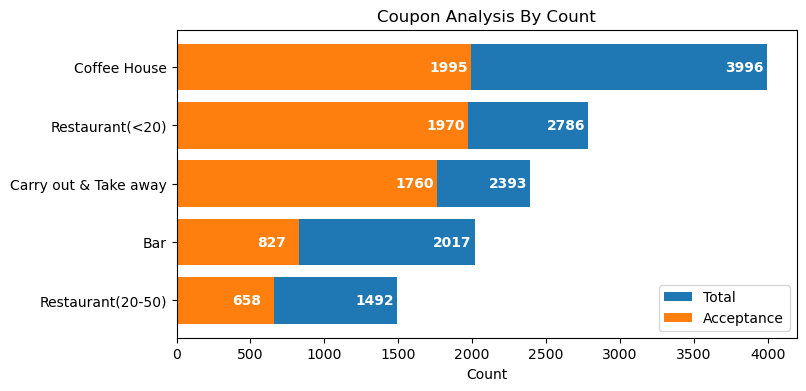

In [2110]:
# Now let's visualize acceptance by counts for all types of coupons
labels_in_percentage = coupon_analysis_df['acceptance'].to_list()

fig, ax = plt.subplots(figsize =(8, 4))
bars_total = plt.barh(coupon_analysis_df['coupon'],coupon_analysis_df['total_count'])
bars_acceptance = plt.barh(coupon_analysis_df['coupon'],coupon_analysis_df['acceptance_count'])
plt.legend(labels=['Total','Acceptance'])
plt.xlabel('Count')
ax.bar_label(bars_total, padding=-30, color='white', label_type='edge', fontweight='bold')
ax.bar_label(bars_acceptance, padding=-30, color='white', label_type='edge', fontweight='bold')
#ax.bar_label(bars_acceptance, labels=[f'{x:.2%}' for x in labels_in_percentage], label_type='center', color='white', fontweight='bold')
plt.title( 'Coupon Analysis By Count')

plt.show()

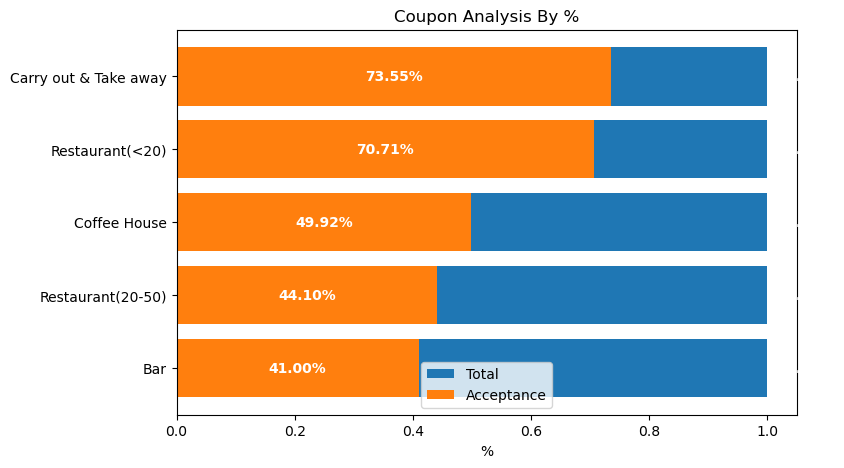

In [2112]:
# Now let's visualize acceptance by % for all types of coupons

coupon_analysis_df_by_percent = coupon_analysis(data, data['coupon'].unique()).sort_values(by='acceptance', ascending=True)
coupon_analysis_df_by_percent 

acceptance_labels_in_percentage = coupon_analysis_df_by_percent['acceptance'].to_list()
total_labels_in_percentage = coupon_analysis_df_by_percent['total_percentage'].to_list()

fig, ax = plt.subplots(figsize =(8, 5))

bars_total = plt.barh(coupon_analysis_df_by_percent['coupon'],coupon_analysis_df_by_percent['total_percentage'])
bars_acceptance = plt.barh(coupon_analysis_df_by_percent['coupon'],coupon_analysis_df_by_percent['acceptance'])


plt.legend(labels=['Total','Acceptance'])
plt.xlabel('%')

ax.bar_label(bars_total, labels=[f'{x:.2%}' for x in total_labels_in_percentage], label_type='edge', color='white', fontweight='bold')
ax.bar_label(bars_acceptance, labels=[f'{x:.2%}' for x in acceptance_labels_in_percentage], label_type='center', color='white', fontweight='bold')
plt.title( 'Coupon Analysis By %')

plt.show()

In [2113]:
print("Conclusion: Of all coupon types Carry out & Take away had the highest acceptance rate, followed by Cheap Restaurants and Coffee House")

Conclusion: Of all coupon types Carry out & Take away had the highest acceptance rate, followed by Cheap Restaurants and Coffee House


##### 7.1 Create a new DataFrame that contains just the Coffee House coupons.

In [2119]:

# create a dataframe
df_coffee = data.query('coupon == "Coffee House"')
df_coffee.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3996 entries, 1 to 12681
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           3996 non-null   object
 1   passanger             3996 non-null   object
 2   weather               3996 non-null   object
 3   temperature           3996 non-null   int64 
 4   time                  3996 non-null   object
 5   coupon                3996 non-null   object
 6   expiration            3996 non-null   object
 7   gender                3996 non-null   object
 8   age                   3996 non-null   object
 9   maritalStatus         3996 non-null   object
 10  has_children          3996 non-null   int64 
 11  education             3996 non-null   object
 12  occupation            3996 non-null   object
 13  income                3996 non-null   object
 14  Bar                   3996 non-null   object
 15  CoffeeHouse           3996 non-null   obje

#### 7.2 What proportion of Coffee coupons were accepted?

In [2122]:
ds_coffee = (df_coffee['Y'].value_counts(normalize=True))
print(ds_coffee)
print("Proportion of coffee coupons accepted is ", ds_coffee[1])

Y
0    0.500751
1    0.499249
Name: proportion, dtype: float64
Proportion of coffee coupons accepted is  0.49924924924924924


#### 7.3 Explore if Coffee House visit frequency has any bearing on Coffee House coupon acceptance

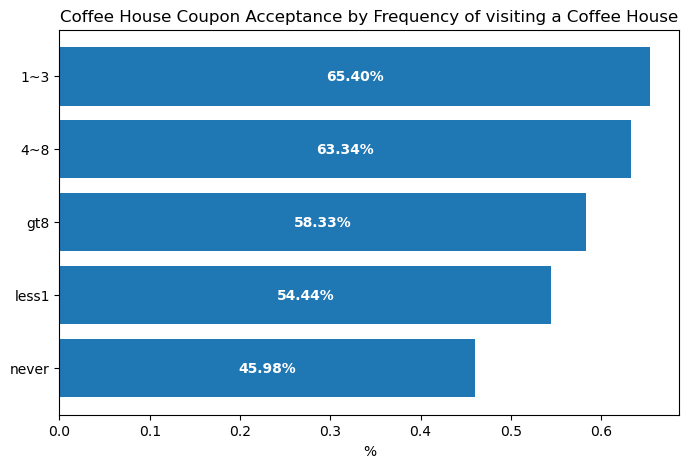

Null Hypthesis - coffee house visiting frequency had no bearing on coffee house coupon acceptance
We can see that acceptance rate was much higher in groups who visited coffee house more often (say 1 to 3 times a month) compared to those who never visited (65.4% vs 45.9%). So we can reject the null hypothesis


In [2125]:
coupon_analysis_by_coffeehouse_frequency_group_visualize = visualize_coupon_analysis_by_feature_group(df_coffee, 'CoffeeHouse', 'Coffee House Coupon Acceptance by Frequency of visiting a Coffee House')
print("Null Hypthesis - coffee house visiting frequency had no bearing on coffee house coupon acceptance")
print("We can see that acceptance rate was much higher in groups who visited coffee house more often (say 1 to 3 times a month) compared to those who never visited (65.4% vs 45.9%). So we can reject the null hypothesis")


#### 7.4 Explore if those visiting coffee house more than once a month and are Single have higher acceptance rate than those who do not meet this condition

Filtered Group = Drivers visiting coffee house more than once a month and are single and received coffee coupons
Total coupon sent out to filtered group
796
Total coupon accepted by the filtered group
540
acceptance_rate_drivers_who_went_to_coffeehouse_more than once and are single
0.678391959798995
Filtered Group = Rest of the world who received coffee house coupons
Total coupon sent out to filtered group
3200
Total coupon accepted by the filtered group
1455
acceptance_rate_drivers_who_do not meet the conditions
0.4546875


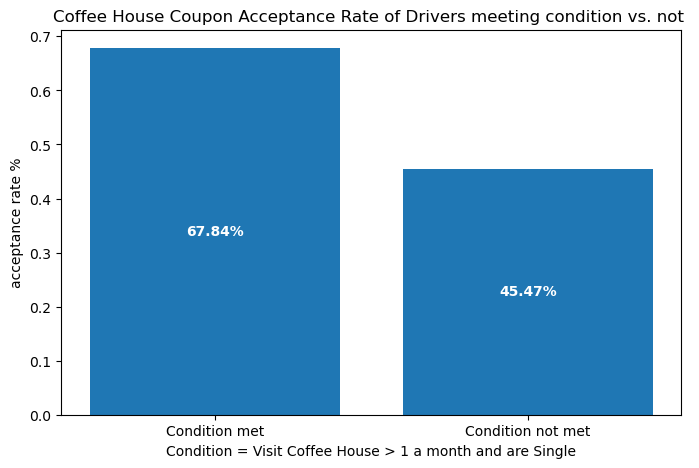

Conclusion: Those drivers meeting the conditions (Drivers who went to coffee house more than once a month and are single and received coffeehouse coupon) had a higher rate of coffeehouse coupon acceptance (approx 67.8% vs. 45.4%)than those drivers who were not meeting the conditions and yet received coffee house coupons


In [2128]:
####### group 1 = Drivers visiting coffee house more than once a month and are single#######################
print("Filtered Group = Drivers visiting coffee house more than once a month and are single and received coffee coupons")
#drivers who go to coffee house more than once a month and received coffee house coupon
coffee_house_group_names_gt_once = ['1~3','gt8', '4~8']

drv_meeting_conditions_prob_7_4 = df_coffee.query('CoffeeHouse in @coffee_house_group_names_gt_once & maritalStatus == "Single"')
targeted_drivers_meeting_conditions_prob7_4_acc = acceptance_rate_considering_coupons_sent_only_to_filter_group(df_coffee,drv_meeting_conditions_prob_7_4)

print("acceptance_rate_drivers_who_went_to_coffeehouse_more than once and are single")
print(targeted_drivers_meeting_conditions_prob7_4_acc)

print("========================")
####### group 2 = Rest of the world who received bar coupons #######################3
print("Filtered Group = Rest of the world who received coffee house coupons")

# rest of the data that do not match above condition
#rest_df = data[~data.isin(drivers_visiting_bar_gt_once_no_kidpassenger_occ)]
rest_df = df_coffee.loc[df_coffee.index.difference(drv_meeting_conditions_prob_7_4.index)]
targeted_to_drivers_not_meeting_conditions_acc = acceptance_rate_considering_coupons_sent_only_to_filter_group(df_coffee, rest_df)
print("acceptance_rate_drivers_who_do not meet the conditions")
print(targeted_to_drivers_not_meeting_conditions_acc)

# visualization
list1 = ['Condition met', 'Condition not met']
list2 =[targeted_drivers_meeting_conditions_prob7_4_acc, targeted_to_drivers_not_meeting_conditions_acc]
visualize_acceptance(list1, list2, 'Coffee House Coupon Acceptance Rate of Drivers meeting condition vs. not ', 'Condition = Visit Coffee House > 1 a month and are Single')

print("Conclusion: Those drivers meeting the conditions (Drivers who went to coffee house more than once a month and are single and received coffeehouse coupon) had a higher rate of coffeehouse coupon acceptance (approx 67.8% vs. 45.4%)than those drivers who were not meeting the conditions and yet received coffee house coupons") 


#### 7.5 Explore if occupation has any bearing on coffee house coupon acceptance

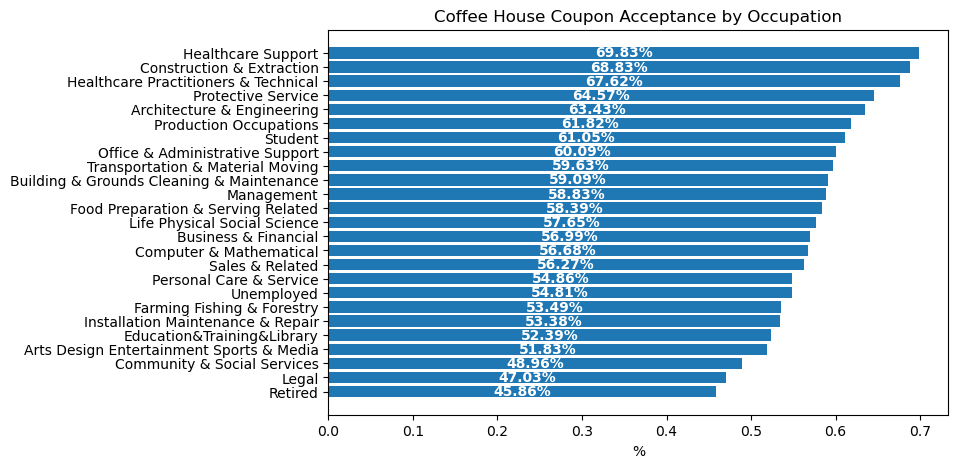

Null Hypthesis - occupation had no bearing on coffee house coupon acceptance.
We can see that anyone employed had higher coffee house coupon acceptance rate that those who were retired. So we can reject the null hypothesis.


In [2131]:
coupon_analysis_by_occupation_visualize = visualize_coupon_analysis_by_feature_group(df_coffee, 'occupation', 'Coffee House Coupon Acceptance by Occupation')
print("Null Hypthesis - occupation had no bearing on coffee house coupon acceptance.")
print("We can see that anyone employed had higher coffee house coupon acceptance rate that those who were retired. So we can reject the null hypothesis.")


In [2132]:
print("Conclusion: Based on observations made for Coffe House coupons, following conclusion can be made - Those who frequented coffee house more than once a month, were single, and were employed in the healthcare or related industry had a higher acceptance rate of coupon acceptance vs. when the conditions are not met.")

Conclusion: Based on observations made for Coffe House coupons, following conclusion can be made - Those who frequented coffee house more than once a month, were single, and were employed in the healthcare or related industry had a higher acceptance rate of coupon acceptance vs. when the conditions are not met.
